## Capstone Project:    Google Analytics Customer Revenue Prediction

### Cheng Miao


In [1]:
import pandas as pd 
import json

# Define COLUMNS
JSON_COLUMNS= ['device', 'geoNetwork', 'totals', 'trafficSource']
print ("Starting read data")
data=pd.read_csv("data.csv",sep=',',header=0,\
                   converters={column:json.loads for column in JSON_COLUMNS})
print('Load Data in Json, that takes long time')
print ("Done reading data")

Starting read data
Load Data in Json, that takes long time
Done reading data


### Dataset Processing

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from pandas.io.json import json_normalize

# json: change into mulitple columns, the object of json_normalize is dict，and the object of json_loads is string
for col in JSON_COLUMNS:
    data_col=json_normalize(data[col])
    data_col.columns = [f"{sub_col}" for sub_col in data_col.columns]
    data = data.drop(col,axis=1).merge(data_col,right_index=True,left_index=True)
print ("end for changing train data")

end for changing train data


In [3]:
# change date format, convenient in statistics

data['date'] = data['date'].astype(str)
data['date'] = data['date'].apply(lambda x:x[:4]+"-"+x[4:6]+"-"+x[6:8])
data['date'] = pd.to_datetime(data['date']) # timestamp
data['month'] = data['date'].apply(lambda x:x.strftime('%Y-%m'))
data['week'] = data['date'].dt.weekday

# transactionRevenue convert
data['transactionRevenue']=data['transactionRevenue'].astype(float).fillna(0)


In [4]:
# hits、pageviews converting

data['hits'] = data['hits'].astype(float)
data['pageviews'] = data['pageviews'].astype(float)


In [5]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent,bounces,hits,newVisits,pageviews,transactionRevenue,visits,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.criteriaParameters,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source,month,week
0,Organic Search,2016-09-02,1.131660e+18,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1.0,1,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,2016-09,4
1,Organic Search,2016-09-02,3.773060e+17,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1.0,1,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,2016-09,4
2,Organic Search,2016-09-02,3.895550e+18,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1,1.0,1,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,2016-09,4
3,Organic Search,2016-09-02,4.763450e+18,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,u

In [6]:

# one column has same value, so drop columns
# print those columns who contain same value.

for r in data.columns:
    a = data[r].value_counts()
    if len(a)<2:
        print(r)
        print(a)
        print('----')

# value is constant, get rid of these, I have 38 columns left.      
data = data.drop(['socialEngagementType','browserSize','browserVersion','flashVersion',\
                  'language','mobileDeviceBranding','mobileDeviceInfo','mobileDeviceMarketingName',\
                  'mobileInputSelector','operatingSystemVersion','screenResolution','screenColors','cityId',\
                  'latitude','longitude','networkLocation','visits','adwordsClickInfo.criteriaParameters','campaignCode'],axis=1)

socialEngagementType
Not Socially Engaged    99999
Name: socialEngagementType, dtype: int64
----
browserSize
not available in demo dataset    99999
Name: browserSize, dtype: int64
----
browserVersion
not available in demo dataset    99999
Name: browserVersion, dtype: int64
----
flashVersion
not available in demo dataset    99999
Name: flashVersion, dtype: int64
----
language
not available in demo dataset    99999
Name: language, dtype: int64
----
mobileDeviceBranding
not available in demo dataset    99999
Name: mobileDeviceBranding, dtype: int64
----
mobileDeviceInfo
not available in demo dataset    99999
Name: mobileDeviceInfo, dtype: int64
----
mobileDeviceMarketingName
not available in demo dataset    99999
Name: mobileDeviceMarketingName, dtype: int64
----
mobileDeviceModel
not available in demo dataset    99999
Name: mobileDeviceModel, dtype: int64
----
mobileInputSelector
not available in demo dataset    99999
Name: mobileInputSelector, dtype: int64
----
operatingSystemVersion
no

In [7]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,mobileDeviceModel,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,transactionRevenue,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source,month,week
0,Organic Search,2016-09-02,1.131660e+18,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,not available in demo dataset,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,2016-09,4
1,Organic Search,2016-09-02,3.773060e+17,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,not available in demo dataset,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,2016-09,4
2,Organic Search,2016-09-02,3.895550e+18,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,not available in demo dataset,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,2016-09,4
3,Organic Search,2016-09-02,4.763450e+18,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,not available in demo dataset,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1.0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,google + online,organic,NaN,google,2016-09,4
4,Organic Search,2016-09-02,2.729440e+16,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,not available in demo dataset,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google,2016-09,4


In [8]:
# drop missing value columns

for r in data.columns:
    a = len(data[r][pd.isnull(data[r])])/len(data)
    if a>0.8:
        print(r)
        print(a)
        print('----')

# starting drop columns
data = data.drop(['adContent','adwordsClickInfo.adNetworkType','adwordsClickInfo.gclId','adwordsClickInfo.isVideoAd','adwordsClickInfo.page','adwordsClickInfo.slot'],axis=1)


adContent
0.986749867498675
----
adwordsClickInfo.adNetworkType
0.974259742597426
----
adwordsClickInfo.gclId
0.9737497374973749
----
adwordsClickInfo.isVideoAd
0.974259742597426
----
adwordsClickInfo.page
0.974259742597426
----
adwordsClickInfo.slot
0.974259742597426
----


In [9]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,mobileDeviceModel,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,hits,newVisits,pageviews,transactionRevenue,campaign,isTrueDirect,keyword,medium,referralPath,source,month,week
0,Organic Search,2016-09-02,1.131660e+18,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,not available in demo dataset,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1.0,1,1.0,0.0,(not set),NaN,(not provided),organic,NaN,google,2016-09,4
1,Organic Search,2016-09-02,3.773060e+17,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,not available in demo dataset,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1.0,1,1.0,0.0,(not set),NaN,(not provided),organic,NaN,google,2016-09,4
2,Organic Search,2016-09-02,3.895550e+18,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,not available in demo dataset,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1.0,1,1.0,0.0,(not set),NaN,(not provided),organic,NaN,google,2016-09,4
3,Organic Search,2016-09-02,4.763450e+18,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,not available in demo dataset,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1.0,1,1.0,0.0,(not set),NaN,google + online,organic,NaN,google,2016-09,4
4,Organic Search,2016-09-02,2.729440e+16,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,not available in demo dataset,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1.0,NaN,1.0,0.0,(not set),True,(not provided),organic,NaN,google,2016-09,4


### EDA: Data Exploration

In [10]:
# explory data
# relationship between "month, week, source, web brosser, device, country, city, internet, etc" value smaller than 15 and views

x_val = []
for r in data.columns:
    a = data[r].value_counts()
    if len(a)<15: # pick length < 15, Data is too scattered
        x_val.append(r)
        print(a)
        print('...........................................')

Organic Search    42019
Social            24377
Direct            15814
Referral          12095
Paid Search        3022
Affiliates         1900
Display             768
(Other)               4
Name: channelGrouping, dtype: int64
...........................................
desktop    74134
mobile     22635
tablet      3230
Name: deviceCategory, dtype: int64
...........................................
False    74140
True     25859
Name: isMobile, dtype: int64
...........................................
not available in demo dataset    99999
Name: mobileDeviceModel, dtype: int64
...........................................
Americas     50434
Asia         24661
Europe       21601
Africa        1600
Oceania       1578
(not set)      125
Name: continent, dtype: int64
...........................................
1    48915
Name: bounces, dtype: int64
...........................................
1    77262
Name: newVisits, dtype: int64
...........................................
(not set)         

In [11]:
# relationship between with transactionRevenue vs income,take the media as an example for the following picture
import matplotlib.pyplot as plt

for x in x_val:
    b = data['transactionRevenue'].groupby(data[x]).sum()
    print(b)
    print('..................................................')

channelGrouping
(Other)           0.000000e+00
Affiliates        0.000000e+00
Direct            4.794300e+10
Display           3.187230e+09
Organic Search    3.730218e+10
Paid Search       4.617160e+09
Referral          8.841384e+10
Social            4.775000e+08
Name: transactionRevenue, dtype: float64
..................................................
deviceCategory
desktop    1.718132e+11
mobile     8.955370e+09
tablet     1.172300e+09
Name: transactionRevenue, dtype: float64
..................................................
isMobile
False    1.718132e+11
True     1.012767e+10
Name: transactionRevenue, dtype: float64
..................................................
mobileDeviceModel
not available in demo dataset    1.819409e+11
Name: transactionRevenue, dtype: float64
..................................................
continent
(not set)    0.000000e+00
Africa       0.000000e+00
Americas     1.802528e+11
Asia         1.232290e+09
Europe       3.918900e+08
Oceania      6.395000e+0

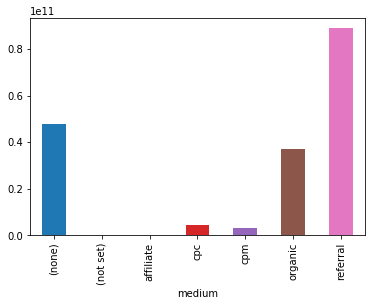

In [12]:
# plot graph
data['transactionRevenue'].groupby(data['medium']).sum().plot('bar')

#### Here can see a distribution of total revenue per user

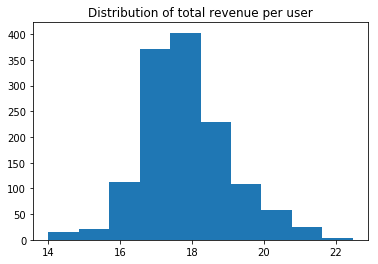

In [13]:
import numpy as np

grouped = data.groupby('fullVisitorId')['transactionRevenue'].sum().reset_index()
grouped = grouped.loc[grouped['transactionRevenue'].isna() == False]
plt.hist(np.log(grouped.loc[grouped['transactionRevenue'] > 0, 'transactionRevenue']));
plt.title('Distribution of total revenue per user');

#### Total revenue by device category and channel

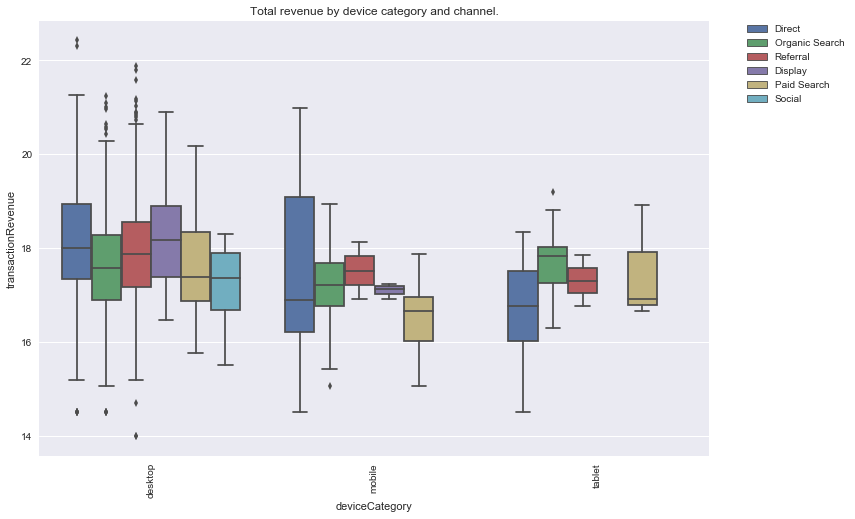

In [14]:
import seaborn as sns

data['transactionRevenue'] = data['transactionRevenue'].fillna(0)
data['transactionRevenue'] = np.log1p(data['transactionRevenue'])
sns.set(rc={'figure.figsize':(12, 8)})
data_r = data.loc[data['transactionRevenue'] > 0.0]
sns.boxplot(x="deviceCategory", y="transactionRevenue", hue="channelGrouping",  data=data_r)
plt.title("Total revenue by device category and channel.");
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Trends of transactions number by paying and non-paying users

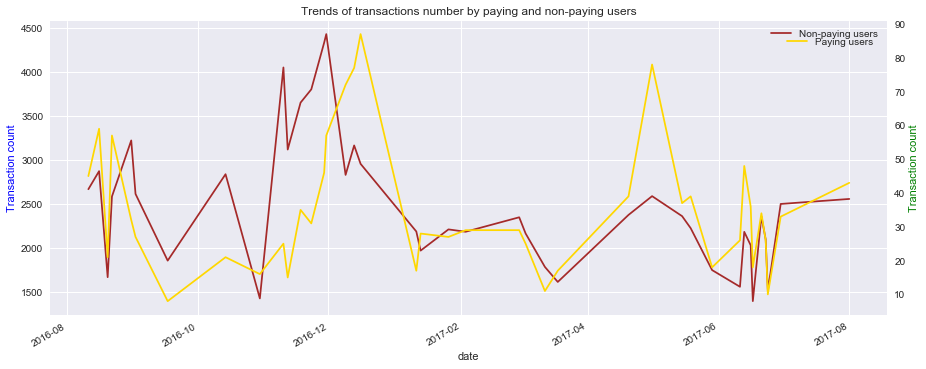

In [15]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plt.title("Trends of transactions number by paying and non-paying users");
data.groupby(['date'])['transactionRevenue'].count().plot(color='brown')
ax1.set_ylabel('Transaction count', color='b')
plt.legend(['Non-paying users'])
ax2 = ax1.twinx()
data_r.groupby(['date'])['transactionRevenue'].count().plot(color='gold')
ax2.set_ylabel('Transaction count', color='g')
plt.legend(['Paying users'], loc=(0.875, 0.9))
plt.grid(False)

#### Explore Device

Mean revenue per transaction


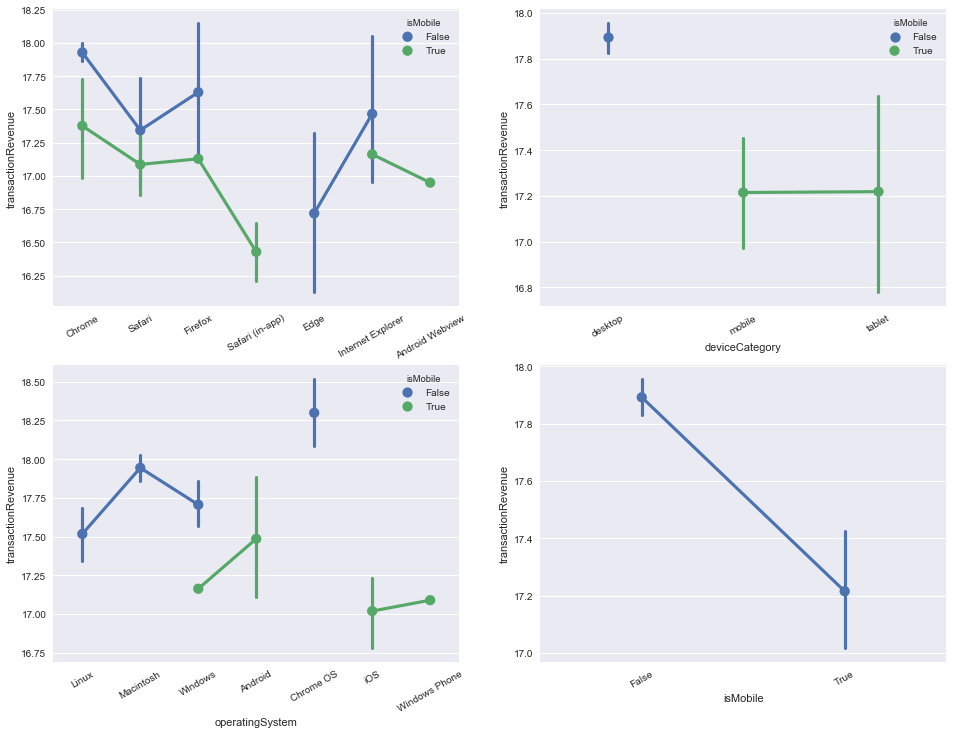

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12))
print('Mean revenue per transaction')
sns.pointplot(x="browser", y="transactionRevenue", hue="isMobile", data=data_r, ax = ax[0, 0]);
sns.pointplot(x="deviceCategory", y="transactionRevenue", hue="isMobile", data=data_r, ax = ax[0, 1]);
sns.pointplot(x="operatingSystem", y="transactionRevenue", hue="isMobile", data=data_r, ax = ax[1, 0]);
sns.pointplot(x="isMobile", y="transactionRevenue", data=data_r, ax = ax[1, 1]);
ax[0, 0].xaxis.set_tick_params(rotation=30);
ax[0, 1].xaxis.set_tick_params(rotation=30);
ax[1, 0].xaxis.set_tick_params(rotation=30);
ax[1, 1].xaxis.set_tick_params(rotation=30);

#### GeoNetwork

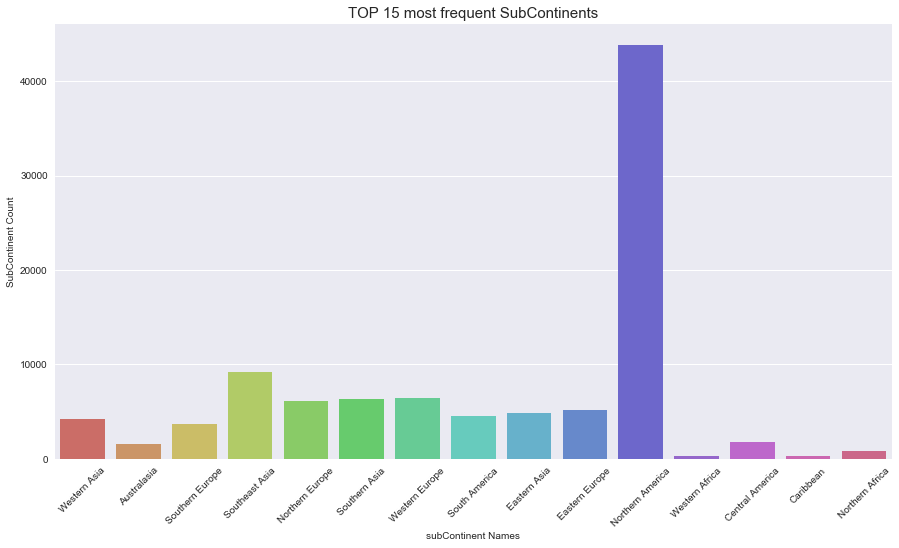

In [17]:
plt.figure(figsize=(15,8))

# explore the browser used by users
sns.countplot(data[data['subContinent']\
                       .isin(data['subContinent']\
                             .value_counts()[:15].index.values)]['subContinent'], palette="hls")
plt.title("TOP 15 most frequent SubContinents", fontsize=15)
plt.xlabel("subContinent Names", fontsize=10)
plt.ylabel("SubContinent Count", fontsize=10)
plt.xticks(rotation=45)
plt.show()

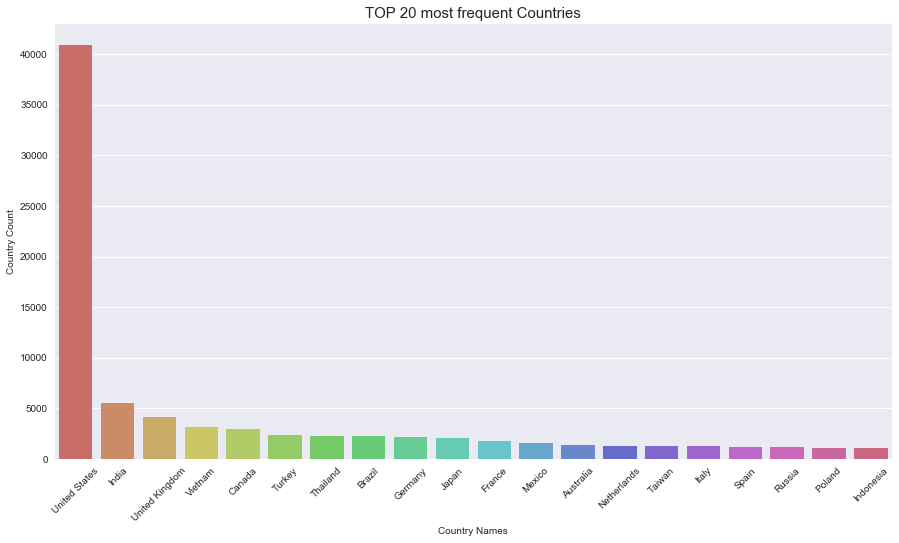

In [18]:
plt.figure(figsize=(15,8))

# explore the browser used by users
sns.countplot(data[data['country'].isin(data['country'].value_counts()[:20].index.values)]['country'],\
              palette="hls", order = data['country'].value_counts()[:20].index)
plt.title("TOP 20 most frequent Countries", fontsize=15)
plt.xlabel("Country Names", fontsize=10)
plt.ylabel("Country Count", fontsize=10)
plt.xticks(rotation=45)
plt.show()

#### Operational System

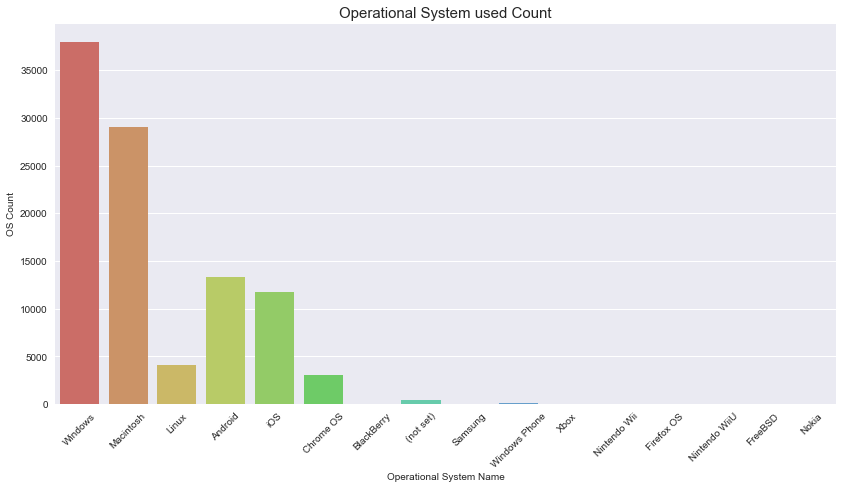

In [19]:
plt.figure(figsize=(14,7))

# explore the browser used by users
sns.countplot(data["operatingSystem"], palette="hls")
plt.title("Operational System used Count", fontsize=15)
plt.xlabel("Operational System Name", fontsize=10)
plt.ylabel("OS Count", fontsize=10)
plt.xticks(rotation=45)

plt.show()

### Start building model

In [20]:
# consider the variable in x_val，expect "week" other variable value give the integer lable
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for x in x_val[:-1]: #week is integer
    data[x+'_code']=label.fit_transform(data[x].values.astype(str))
x_val_code=[]
for x in x_val[:-1]:
    x_val_code.append(str(x+"_code"))

data_= pd.concat([data['week'],data[x_val_code]],axis=1) 
# change string to int，in order to do regression

In [21]:
data_.head()

,week,channelGrouping_code,deviceCategory_code,isMobile_code,mobileDeviceModel_code,continent_code,bounces_code,newVisits_code,campaign_code,isTrueDirect_code,medium_code,month_code
0,4,4,0,0,0,3,0,0,0,1,5,1
1,4,4,0,0,0,5,0,0,0,1,5,1
2,4,4,0,0,0,4,0,0,0,1,5,1
3,4,4,0,0,0,3,0,0,0,1,5,1
4,4,4,1,1,0,4,0,1,0,0,5,1


In [22]:
X=data_
y=data["transactionRevenue"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [23]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

gbm=lgb.LGBMRegressor(num_leaves=31,
                     learning_rate=0.1,
                     n_estimators=20)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))


# self-defined eval metric
# f(y_true: array, y_pred: array) -> name: string, eval_result: float, is_higher_better: bool
# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False


print('Starting training with custom eval function...')
# train
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=rmsle,
        early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmsle of prediction is:', rmsle(y_test, y_pred)[1])

# other scikit-learn modules
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [10, 20, 40], 
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


[1]	valid_0's l2: 4.38725	valid_0's l1: 0.488522
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 4.34299	valid_0's l1: 0.485281
[3]	valid_0's l2: 4.30754	valid_0's l1: 0.482404
[4]	valid_0's l2: 4.27729	valid_0's l1: 0.479703
[5]	valid_0's l2: 4.2536	valid_0's l1: 0.477434
[6]	valid_0's l2: 4.23376	valid_0's l1: 0.475494
[7]	valid_0's l2: 4.21987	valid_0's l1: 0.473685
[8]	valid_0's l2: 4.20675	valid_0's l1: 0.472015
[9]	valid_0's l2: 4.19588	valid_0's l1: 0.470414
[10]	valid_0's l2: 4.18769	valid_0's l1: 0.469373
[11]	valid_0's l2: 4.18054	valid_0's l1: 0.468123
[12]	valid_0's l2: 4.1756	valid_0's l1: 0.467216
[13]	valid_0's l2: 4.1704	valid_0's l1: 0.466261
[14]	valid_0's l2: 4.16684	valid_0's l1: 0.465407
[15]	valid_0's l2: 4.16426	valid_0's l1: 0.464823
[16]	valid_0's l2: 4.16173	valid_0's l1: 0.463989
[17]	valid_0's l2: 4.16044	valid_0's l1: 0.463403
[18]	valid_0's l2: 4.15914	valid_0's l1: 0.462884
[19]	valid_0's l2: 4.16048	valid_0's l1: 0.462705
[

In [24]:
print('LightGBM results:',y_pred)

LightGBM results: [0.39616228 0.16217122 0.53179822 ... 0.16217122 0.21975678 0.16217122]


In [25]:
#import lightgbm as lgb
# reference: this model code kaggle:
# will reference code in the report

lgb_params = {"objective" : "regression", 
              "metric" : "rmse",
              "num_leaves" : 500, 
              "learning_rate" : 0.1, 
              "bagging_fraction" : 0.5, 
              "feature_fraction" : 0.5,
              "bagging_frequency" : 1,
              "bagging_seed" : 1, 
              "lambda_l1": 3,
              'min_data_in_leaf': 50,
              'verbose':0,
              'min_child_samples':20
}
    
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val)
model = lgb.train(lgb_params, lgb_train, 10000, valid_sets=[lgb_train, lgb_val],
                  early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 2.0096	valid_1's rmse: 2.0525
Early stopping, best iteration is:
[59]	training's rmse: 2.01491	valid_1's rmse: 2.05153


In [26]:
#len(y_train)

In [27]:
preds = pd.Series(model.predict(X_test, 
                                num_iteration=model.best_iteration))

In [29]:
from sklearn.metrics import mean_squared_error

def rsme(y,pred):
    return(mean_squared_error(y,pred)**0.5)

acc=rsme(y_val,preds)
print('rmse:', acc)

rmse: 2.163472977303681


In [30]:
#print(preds)

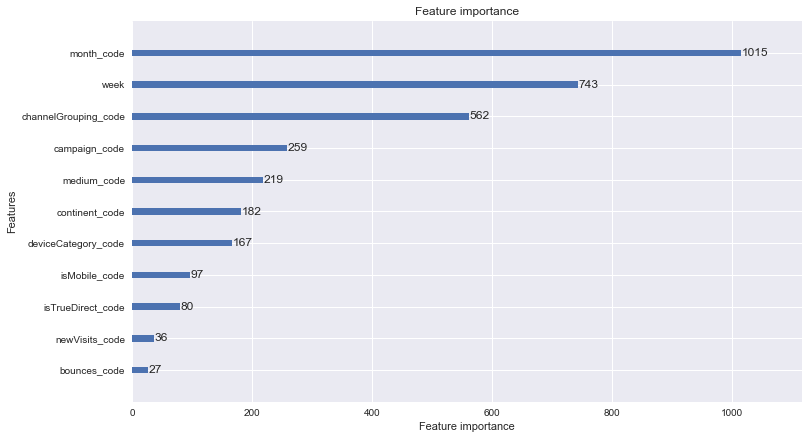

In [31]:
lgb.plot_importance(model, figsize=(12, 7))
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred_test=rf.predict(X_test)
print('prediction:',rf_pred_test)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,rf_pred_test)))

prediction: [1.07289045 0.         2.00610394 ... 0.         0.         0.        ]
RMSE 2.111371285334852


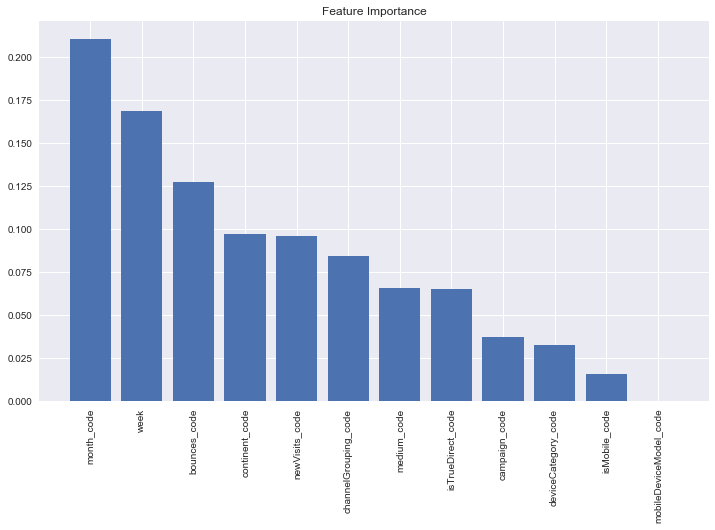

In [33]:
rf_importances=rf.feature_importances_
indices=np.argsort(rf_importances)[::-1]
features = [X.columns[i] for i in indices]

plt.figure(figsize=(12,7))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), rf_importances[indices])

plt.xticks(range(X.shape[1]), features, rotation=90)
plt.show()

In [34]:
from sklearn import preprocessing
data_standardized=preprocessing.scale(data_)
print("done")

done


In [35]:
# reduce dimension of features
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95) #n_components<=n_classes-1

pca_data=pca.fit_transform(data_standardized)
print (pca_data[1])

[-1.21675246  0.32847542  1.82301643 -1.77005558  0.85666901  0.72287247
 -0.52267115  1.12312211]


In [36]:
from sklearn import preprocessing
data_standardized=preprocessing.scale(data_)
print("done")

done


In [37]:
print (data_standardized)

[[ 0.66388965 -0.35160861 -0.55900827 ...  0.66174279  0.26539451
  -1.15060424]
 [ 0.66388965 -0.35160861 -0.55900827 ...  0.66174279  0.26539451
  -1.15060424]
 [ 0.66388965 -0.35160861 -0.55900827 ...  0.66174279  0.26539451
  -1.15060424]
 ...
 [ 1.84791498  1.34339112 -0.55900827 ...  0.66174279  0.74682225
  -0.86322332]
 [ 1.84791498  1.34339112 -0.55900827 ...  0.66174279  0.74682225
  -0.86322332]
 [ 1.84791498  1.34339112 -0.55900827 ...  0.66174279  0.74682225
  -0.86322332]]


In [38]:
import torch
import torch.nn.functional as F  # implementation activation function
import matplotlib.pyplot as plt 
from torch.autograd import Variable

X=pca_data
y=data["transactionRevenue"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [39]:
#Convert data for pytorch training more easy
X_train=torch.from_numpy(np.array(X_train))
y_train=(torch.from_numpy(np.array(y_train))).view(59999,1)
X, y = Variable(X_train,requires_grad=True), Variable(y_train,requires_grad=True)

In [40]:
# convert data type float
x=X.float()
y=y.float()

In [41]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as tf


# define model
class net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(net, self).__init__()
        #self.poly = nn.Linear(6,1)
#         self.l1 = torch.nn.Linear(8, 6)
#         self.l2 = torch.nn.Linear(6, 5)
#         self.l3 = torch.nn.Linear(5, 4)
#         self.l4 = torch.nn.Linear(4, 3)
#         self.l5 = torch.nn.Linear(3, 2) 
#         self.l6 = torch.nn.Linear(2, 1)
        self.hidden = torch.nn.Linear(8, 9)
        self.predict = torch.nn.Linear(9, 1)


    def forward(self, x):
        x = tf.relu(self.hidden(x))  #  function (linear value of hidden layer)
        x = self.predict(x)   # output
        return x
#         x = self.l1(x)
#         x = self.l2(x)
#         x = self.l3(x)
#         x = self.l4(x)
#         x = self.l5(x)
#         out=self.l6(x)
      
        #out = self.poly(x)
        #return out

In [42]:

net = net(n_feature=8,n_hidden=9,n_output=1)

if __name__ == '__main__':
    #W_target = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)
    #b_target = torch.FloatTensor([0.9])

#     if torch.cuda.is_available():
#         model = poly_model().cuda()
#     else:
#         model = poly_model()

# define criterion and optimizer
    criterion = torch.nn.MSELoss(size_average=False)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
#x=torch.optim.SparseAdam
#epoch = 0
# after done define model, starting training   
for t in range(500):
    prediction = net(x)     # give model training dataset: x, output the predict value

    #output = model(x)
    loss = criterion(prediction, y)# calcuate the loss between prediction and y
    print_loss = loss.item()     

    optimizer.zero_grad()   #  clear out the last step the remaining value of parameters
    #loss.backward()         #  loss backward, calculate updated value
    loss.backward
    optimizer.step()
# output loss
print (loss)

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(261035.9688, grad_fn=<SumBackward0>)


In [43]:
epochs = 2000
optimizer = torch.optim.SparseAdam(net.parameters(), lr=0.0001)
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time
    #inputs = Variable(torch.from_numpy(x_train))
    #labels = Variable(torch.from_numpy(y_correct))

    #clear grads as discussed in prev post
    optimizer.zero_grad()
    #forward to get predicted values
    outputs = net(x)
    loss = criterion(outputs, y)
    loss.backward()# back props
    #optimizer.step()# update the parameters
print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 2000, loss 261035.96875


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [44]:
print ('MLP results:',prediction)

MLP results: tensor([[ 0.2365],
        [ 0.3104],
        [-0.1188],
        ...,
        [ 0.0150],
        [ 0.0648],
        [ 0.0783]], grad_fn=<ThAddmmBackward>)


In [45]:
print (y)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], grad_fn=<CopyBackwards>)


In [46]:
print(torch.__version__)

0.4.1
